In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
from datetime import datetime as dt
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

Text(0.5,1,'Last 12 months of Precipitation')

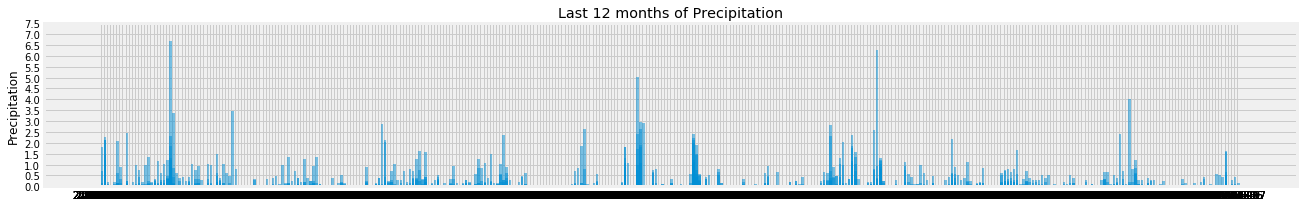

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
conn = engine.connect()

precip = pd.read_sql("SELECT * FROM Measurement WHERE date > '2016-08-22'", conn)
precip.head()
y_pos = list(np.arange(0,precip.prcp.max()+1,.5))

plt.figure(figsize=(20, 3))
plt.bar(precip['date'], precip['prcp'], align = 'edge', alpha = .5)
plt.xticks(precip['date'])
plt.yticks(y_pos)
plt.ylabel('Precipitation')
plt.title('Last 12 months of Precipitation')

In [14]:


# Calculate the date 1 year ago from the last data point in the database
data_measurement = pd.read_sql("SELECT * FROM Measurement", conn)
data_measurement.date = pd.to_datetime(data_measurement.date)
data_measurement.date.max() - pd.Timedelta(days=365)
data_measurement.date.max() - pd.Timedelta(days=365)
y_pos2 = list(np.arange(0,data_measurement.prcp.max()+1,.5))


# Perform a query to retrieve the data and precipitation scores
df_yr = pd.read_sql("SELECT date, prcp FROM Measurement WHERE date > '2016-08-22'", conn)

# Save the query results as a Pandas DataFrame and set the index to the date column
df_yr = df_yr.set_index('date')
df_yr.head()




,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


Text(0.5,0,'date')

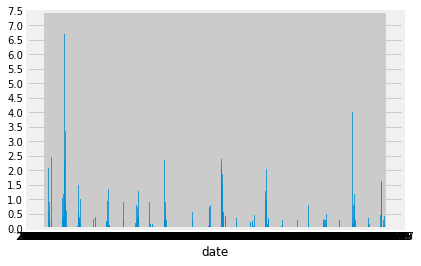

In [15]:
# Sort the dataframe by date
df_yr.sort_index().head()

# Use Pandas Plotting with Matplotlib to plot the data
y_pos2 = list(np.arange(0,df_yr.prcp.max()+1,.5))
precipitation = df_yr['prcp']

plt.bar(df_yr.index.values, precipitation, align = 'edge', alpha = .8, width = .3)
# plt.xticks(df_yr['date'])
plt.yticks(y_pos2)
plt.xlabel('date')
# plt.ylabel('precipitation')
# plt.title('Precipitation')

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_yr.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
# Design a query to show how many stations are available in this dataset?
session.query(Station).count()

9

In [18]:
from sqlalchemy import func
from sqlalchemy import desc

# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
precip.head()

,id,station,date,prcp,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1,2365,USC00519397,2016-08-24,0.08,79.0
2,2366,USC00519397,2016-08-25,0.08,80.0
3,2367,USC00519397,2016-08-26,0.00,79.0
4,2368,USC00519397,2016-08-27,0.00,77.0


In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.max(Measurement.tobs),func.min(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(85.0, 54.0, 71.66378066378067)]

In [21]:
session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
temp = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281', Measurement.date > '2016-08-22').all()

temp_min = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281', Measurement.date > '2016-08-22').all()

temp_max = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281', Measurement.date > '2016-08-22').all()

# list(np.arange(temp_min,temp_max,5))

x_axis = list(np.arange(55,95, 5))
x_axis

[55, 60, 65, 70, 75, 80, 85, 90]

Text(0,0.5,'Frequency')

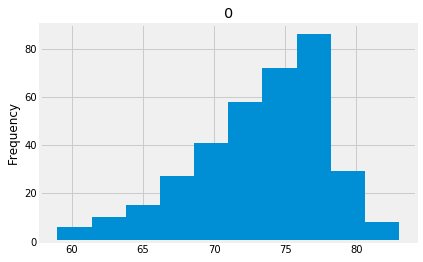

In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281', Measurement.date > '2016-08-22').all()

temp_hist = pd.DataFrame.from_records(temp)
temp_hist.hist(bins=10)
plt.ylabel('Frequency')


In [24]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [25]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2011-02-28', '2011-03-05'))

[(61.0, 69.75510204081633, 75.0)]


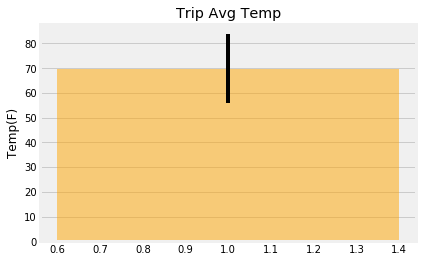

In [26]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

x_pos = [1]
calc_graph = calc_temps('2011-02-28', '2011-03-05')
error = calc_graph[0][2] - calc_graph[0][0]
calc_graph = [calc_graph[0][1]]

# Build the plot

fig, ax = plt.subplots()
ax.bar(x_pos, calc_graph, yerr=error, align='center', alpha=0.5, color='orange')
ax.set_ylabel('Temp(F)')
ax.set_title('Trip Avg Temp')
ax.yaxis.grid(True)
ax.xaxis.grid(False)


In [27]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [88]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`


# Set the start and end date of the trip
start = "2016-05-05"
trip_length = 10

start = dt.strptime(start, '%Y-%m-%d')
end = start + timedelta(days=trip_length)

# Use the start and end date to create a range of dates
normals = [start + timedelta(days=x) for x in range(trip_length)] 

# Stip off the year and save a list of %m-%d strings
normals = [ x.strftime("%m-%d") for x in normals]

# Loop through the list of %m-%d strings and calculate the normals for each date
trip_normals = [daily_normals(x) for x in normals]
trip_normals


[[(67.0, 73.39655172413794, 79.0)],
 [(66.0, 73.14035087719299, 80.0)],
 [(64.0, 71.78846153846153, 79.0)],
 [(65.0, 72.18867924528301, 80.0)],
 [(67.0, 72.9322033898305, 79.0)],
 [(64.0, 73.3157894736842, 78.0)],
 [(65.0, 73.61111111111111, 79.0)],
 [(65.0, 73.13793103448276, 79.0)],
 [(67.0, 73.14285714285714, 79.0)],
 [(63.0, 73.89285714285714, 80.0)]]

In [92]:
#unpack lis of list
trip_temps = []
for x in trip_normals:
    trip_temps.append(x[0])
trip_temps
    

[(67.0, 73.39655172413794, 79.0),
 (66.0, 73.14035087719299, 80.0),
 (64.0, 71.78846153846153, 79.0),
 (65.0, 72.18867924528301, 80.0),
 (67.0, 72.9322033898305, 79.0),
 (64.0, 73.3157894736842, 78.0),
 (65.0, 73.61111111111111, 79.0),
 (65.0, 73.13793103448276, 79.0),
 (67.0, 73.14285714285714, 79.0),
 (63.0, 73.89285714285714, 80.0)]

In [96]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

temp_df = pd.DataFrame(trip_temps,index=normals, columns=['tmin', 'tavg', 'tmax'])


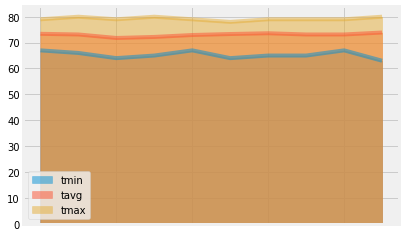

In [99]:
# Plot the daily normals as an area plot with `stacked=False`
ax = temp_df.plot.area(stacked=False)
